In [199]:
import numpy as np
import matplotlib.pyplot as plt

## Definition of the function of the question 2

In [200]:
def f1(t,y):
    return y

def f2(t,y):
    return -y+t

def f3(t,y):
    return np.array([y[1], 2*t-y[0]])

## Definition of the initial conditions of the question 2

In [201]:
# Initial conditions for 1
y0_1 = 1
a1 = 0
b1 = 1

# Initial conditions for 2
a2 = 0
b2 = 2
y0_2 = 1

# Initial conditions for 3
y0_3 = np.array([0, 1])
a3 = 0
b3 = 5

## Question 1 - Euler Explicit Method

In [202]:
def EulerExplicit(f, a, b, y0, N):
    x = [a]
    h = (b-a)/N  # step size
    t = np.linspace(a, b, N+1)  # time vector between a and b
    
    y_n = [y0]  # list to store the values of y

    for i in range(N):
        x.append(x[-1]+h)  # Append the value of x to the list
        y_n.append(y_n[i] + h*f(t[i], y_n[i]))  # Euler Explicit Method and append the value to the list
        
    return y_n, x
            

## Question 2 - Experimentation of the Euler Explicit Method

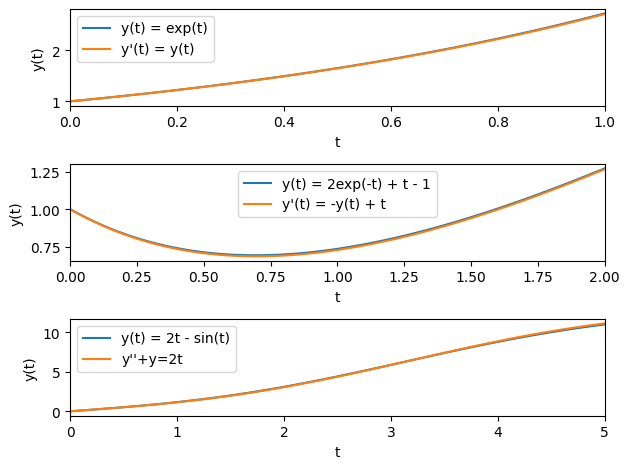

In [ ]:
N = 100

list_value_function_1, x1 = EulerExplicit(f1, a1, b1, y0_1, N)
list_value_function_2, x2 = EulerExplicit(f2, a2, b2, y0_2, N)
list_value_function_3, x3 = EulerExplicit(f3, a3, b3, y0_3, N)
for i in range (len(list_value_function_3)):
    list_value_function_3[i] = list_value_function_3[i][0]

fig, axis = plt.subplots(3)  # Create a figure and a set of subplots

# Plot the first function on the first subplot
t1 = np.linspace(a1, b1, N+1)  # time vector between a and b
axis[0].plot(t1, np.exp(x1), label='y(t) = exp(t)')
axis[0].plot(x1, list_value_function_1, label="y'(t) = y(t)")
axis[0].set_xlabel('t')
axis[0].set_xlim([a1, b1])  # Set the limits of the x-axis
axis[0].set_ylabel('y(t)')
axis[0].legend()


# Plot the second function on the second subplot
t2 = np.linspace(a2, b2, N+1)  # time vector between a and b
axis[1].plot(t2, 2*np.exp(-t2) + t2 -1, label='y(t) = 2exp(-t) + t - 1')
axis[1].plot(x2, list_value_function_2, label="y'(t) = -y(t) + t")
axis[1].set_xlabel('t')
axis[1].set_ylabel('y(t)')
axis[1].set_xlim([a2, b2])  # Set the limits of the x-axis
axis[1].legend()

# Plot the third function on the third subplot
t3 = np.linspace(a3, b3, N+1)
axis[2].plot(t3, 2*t3-np.sin(t3), label='y(t) = 2t - sin(t)')
axis[2].plot(x3, list_value_function_3, label="y''+y=2t")
axis[2].set_xlabel('t')
axis[2].set_ylabel('y(t)')
axis[2].set_xlim([a3, b3])  # Set the limits of the x-axis
axis[2].legend()

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

As we can see the Euler Explicit Method is accurate for the two function in the interval [0,1] and [0,2] respectively. However, for the third function, the method is a little bit less accurate. This is due to the fact that the Euler Explicit Method is more accurate for first order differential equations. The third function is a second order differential equation.

## Question 3 - Question 3 - Runga-Kutta Method

In [204]:
"""Initial conditions"""

y0 = np.array([1])
y03 = np.array([0,1])

"""Number of subdivisions"""

N = 100

"""Intervals"""

a1 = 0
b1 = 1

a2 = 0
b2 = 2

a3 = 0
b3 = 5

"""Exact solutions"""
#Function 1
t_sol_1 = np.linspace(a1, b1, N + 1)
y_sol_1 = np.exp(t_sol_1)
#Function 2
t_sol_2 = np.linspace(a2, b2, N + 1)
y_sol_2 = t_sol_2 - 1 + 2*np.exp(-t_sol_2)
#Function 3
t_sol_3 = np.linspace(a3, b3, N + 1)
y_sol_3 = 2*t_sol_3 - np.sin(t_sol_3)

### Function RK2

In [205]:
def RK2(F,a,b,y0,N):
    h = (b-a)/N
    t_values = np.linspace(a, b, N + 1)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        k1 = h * F(t, y)
        k2 = h * F(t + h/2, y + k1/2)
        y_values[i+1] = y + k2
    return t_values, y_values

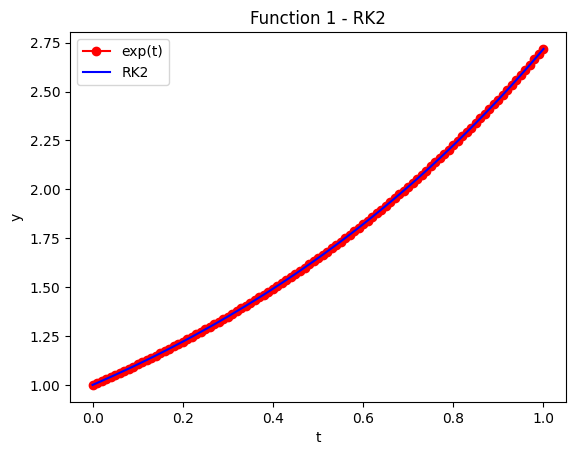

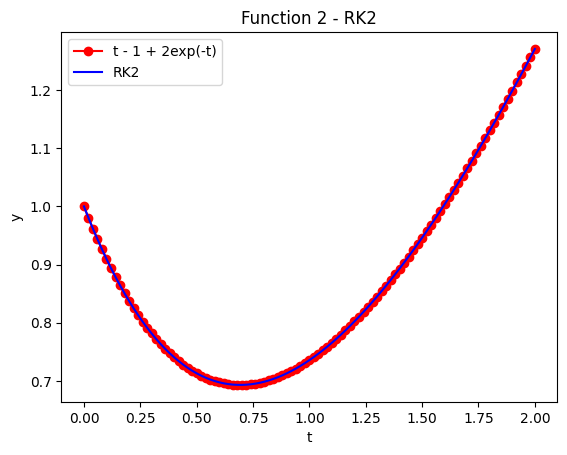

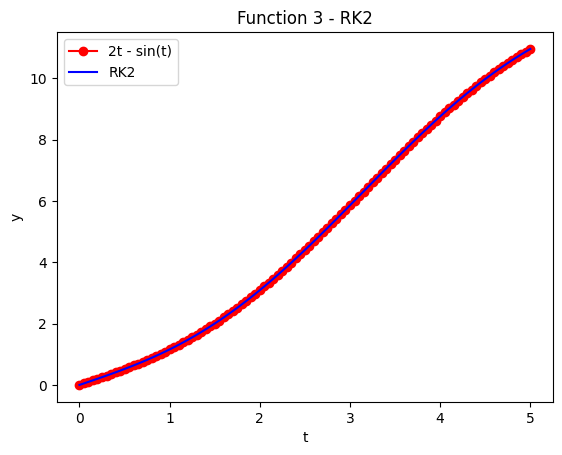

In [206]:
"""Function 1"""

t_rk2_1, Y_rk2_1 = RK2(f1, a1, b1, y0, N)
plt.plot(t_sol_1,y_sol_1, label='exp(t)', color='red', marker='o')
plt.plot(t_rk2_1, Y_rk2_1, label='RK2', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 1 - RK2')
plt.legend()
plt.show()

"""Function 2"""

t_rk2_2, Y_rk2_2 = RK2(f2, a2, b2, y0, N)
plt.plot(t_sol_2,y_sol_2, label='t - 1 + 2exp(-t)', color='red', marker='o')
plt.plot(t_rk2_2, Y_rk2_2, label='RK2', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 2 - RK2')
plt.legend()
plt.show()

"""Function 3"""

t_rk2_3, Y_rk2_3 = RK2(f3, a3, b3, y03, N)
plt.plot(t_sol_3,y_sol_3, label='2t - sin(t)', color='red', marker='o')
plt.plot(t_rk2_3, Y_rk2_3[:,0], label='RK2', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 3 - RK2')
plt.legend()
plt.show()

We can see that the Runge-Kutta 2nd order method is less accurate than the Euler Explicit Method for the first two functions. However, for the third function, the method is more accurate than the Euler Explicit Method. This is due to the fact that the Runge-Kutta 2nd order method is more accurate for second order differential equations.

### Function RK4

In [207]:
def RK4(F,a,b,y0,N):
    h = (b-a)/N
    t_values = np.linspace(a, b, N + 1)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        k1 = h * F(t, y)
        k2 = h * F(t + h/2, y + k1/2)
        k3 = h * F(t + h/2, y + k2/2)
        k4 = h * F(t + h, y + k3)
        y_values[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_values, y_values

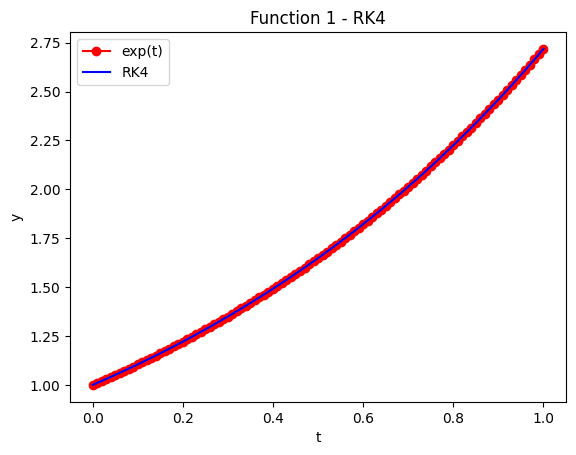

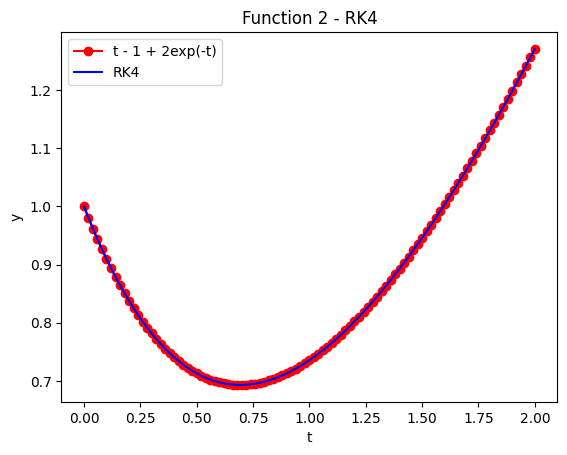

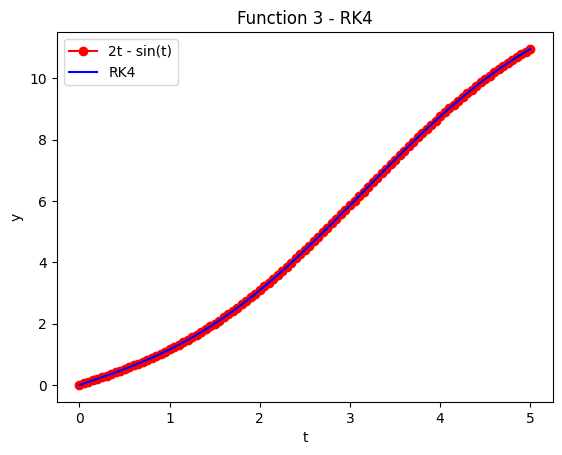

In [208]:
"""Function 1"""

t_rk4_1, y_rk4_1 = RK4(f1, a1, b1, y0, N)
plt.plot(t_sol_1,y_sol_1, label='exp(t)', color='red', marker='o')
plt.plot(t_rk4_1, y_rk4_1, label='RK4', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 1 - RK4')
plt.legend()
plt.show()

"""Function 2"""

t_rk4_2, y_rk4_2 = RK4(f2, a2, b2, y0, N)
plt.plot(t_sol_2,y_sol_2, label='t - 1 + 2exp(-t)', color='red', marker='o')
plt.plot(t_rk4_2, y_rk4_2, label='RK4', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 2 - RK4')
plt.legend()
plt.show()

"""Function 3"""

t_rk4_3, y_rk4_3 = RK4(f3, a3, b3, y03, N)
plt.plot(t_sol_3,y_sol_3, label='2t - sin(t)', color='red', marker='o')
plt.plot(t_rk4_3, y_rk4_3[:,0], label='RK4', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Function 3 - RK4')
plt.legend()
plt.show()

We can see that the Runge-Kutta 4th order method is more accurate than the Euler Explicit Method and the Runge-Kutta 2nd order method for all the functions. This is due to the fact that the Runge-Kutta 4th order method is more accurate for first and second order differential equations.

## Question 4 - Pendulum motion

In [209]:
L = 1
g = 9.81
N = 200 # to have h=0.04
initial_conditions = np.array([np.pi/2, 0])
a = 0
b = 8

def f4(t,y):
    return np.array([y[1], (-g/L)*np.sin(y[0])])

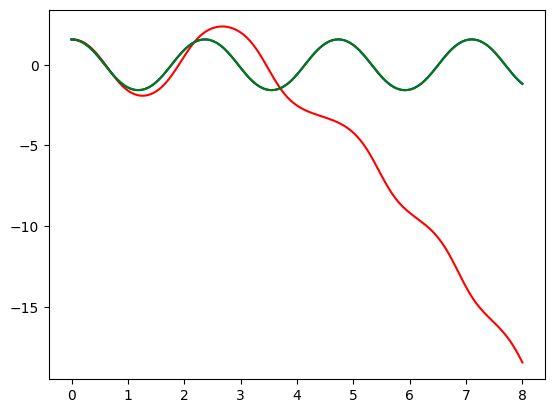

In [210]:
y_n_euler, x = EulerExplicit(f4, a, b, initial_conditions, N)  # Euler Explicit Method
t_rk2, y_rk2 = RK2(f4, a, b, initial_conditions, N)  # Runge-Kutta 2nd order
t_rk4, y_rk4_exo4 = RK4(f4, a, b, initial_conditions, N)  # Runge-Kutta 4th order

for i in range (len(y_n_euler)):
    y_n_euler[i] = y_n_euler[i][0]

plt.plot(x, y_n_euler, label='Euler Explicit', color='red')
plt.plot(t_rk2, y_rk2[:,0], label='RK2', color='blue')
plt.plot(t_rk4, y_rk4_exo4[:,0], label='RK4', color='green')
plt.title("Pendulum motion")
plt.show()

As we can see the two Runge-Kutta methods are converging towards the same solution along all the time considering in this exercise. However, it is not the case of the Euler method. In fact, it suits the solution during a small among of time approximately between 0 and 1, and after diverges from the original solutions. Therefore, this method can be used to approximate a small region of the original differential equation but not on a much bigger interval. This is due to the fact that the explicit Euler Method is less accurate for a second order differential equation